# 02 - PCA (Dimensionality Reduction)

In [ ]:
# Required Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Import Cleaned Dataset

heart_disease = pd.read_csv(r'C:\Users\eyad0\Documents\python\Heart_Disease_Project\data\heart_disease_clean.csv') 
heart_disease.head()

x_pca = heart_disease.drop('num', axis=1)
y = heart_disease['num']


In [38]:
# Apply PCA without specifying n_components
pca = PCA()
x_pca_transformed = pca.fit_transform(x_pca)

# Explained Varience Rations
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Determine optimal number of components 
optimal_components = next(i for i, cum_var in enumerate(cumulative_variance, start=1) if cum_var >= 0.95)
print(f"Optimal number of components to retain >=95% variance: {optimal_components}")

Optimal number of components to retain >=95% variance: 13


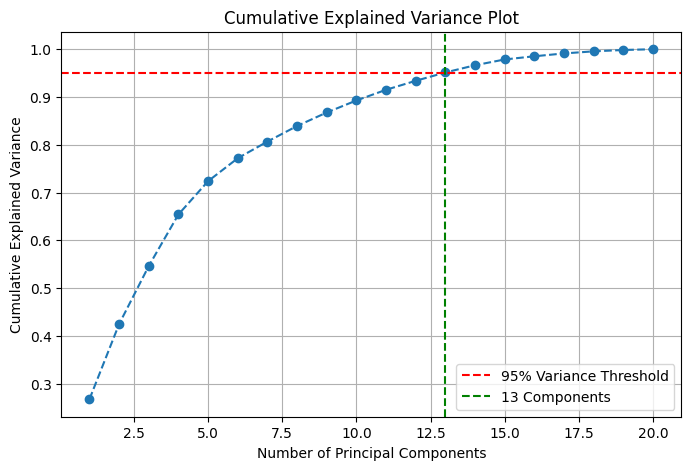

In [39]:
# Plot Cumulative explained variance

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance Threshold")
plt.axvline(x=optimal_components, color='g', linestyle='--', label=f"{optimal_components} Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance Plot")
plt.legend()
plt.grid(True)
plt.show()

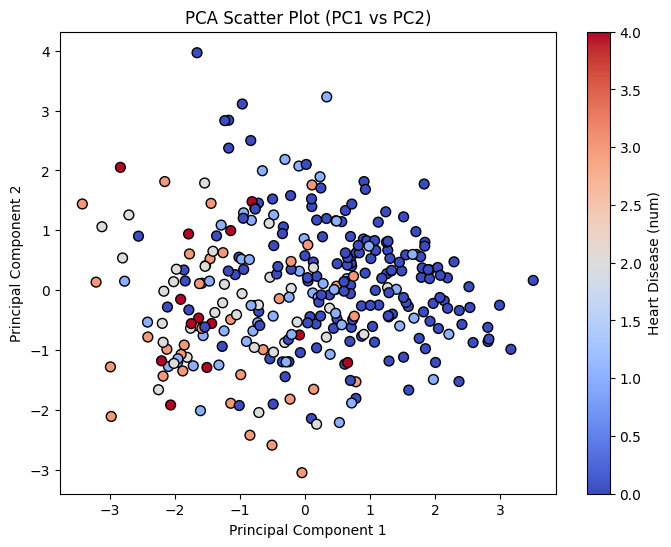

In [40]:
# Plot Scatter plot of first 2 principal components

plt.figure(figsize=(8,6))
plt.scatter(x_pca_transformed[:, 0], x_pca_transformed[:, 1], c=y, cmap="coolwarm", edgecolor="k", s=50)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot (PC1 vs PC2)")
plt.colorbar(label="Heart Disease (num)")
plt.show()

In [41]:
# Apply PCA with 13 components (optimal number)
pca_opt = PCA(n_components=13)
x_reduced = pca_opt.fit_transform(x_pca)


print("Original shape:", x_pca.shape)
print("Reduced shape:", x_reduced.shape)

Original shape: (303, 20)
Reduced shape: (303, 13)


In [42]:
# Saving PCA Dataframe 
pca_df = pd.DataFrame(x_reduced, columns=[f"PC{i}" for i in range(1, 14)])
pca_df["num"] = y.values

# Save dataset for next notebook
pca_df.to_csv(r'C:\Users\eyad0\Documents\python\Heart_Disease_Project\data\heart_disease_pca.csv', index=False)
print("PCA dataset saved as heart_disease_pca.csv")

PCA dataset saved as heart_disease_pca.csv
